In [1]:
import gym
from gym.envs.registration import register
register(
    id='D4x4-FrozenLake-v0',
    entry_point='gym.envs.toy_text.frozen_lake:FrozenLakeEnv',
    kwargs={'map_name': '4x4',
            'is_slippery': True})
env = gym.make('D4x4-FrozenLake-v0')

In [4]:
gamma = 0.9
import numpy as np

In [5]:
pi=np.random.randint(0,3,16)

In [7]:
def eval_policy(env, pi, v):
    v_new = np.zeros(env.nS)
    for s in range(0, env.nS):
        for t in env.P[s][pi[s]]:
            v_new[s] = v_new[s] + t[0]*(t[2] + gamma*v[t[1]]) 
    return v_new

In [17]:
def mod_policy(env , v):
    pi = np.random.randint(0,3,16)
    for s in range(0, env.nS):
        v_opt = 0
        for a in range(0, env.nA):
            v_temp = 0
            for t in env.P[s][a]:
                v_temp = v_temp + t[0]*(t[2] + gamma*v[t[1]])
            if v_opt <= v_temp:
                v_opt = v_temp
                pi[s] = a 
    return pi

In [50]:
v = np.random.random(env.nS)
v_new = v

In [51]:
n_itr = 1000
eps = n_itr*[None]
for i in range(0,n_itr):
    pi = mod_policy(env, v_new)
    v = eval_policy(env, pi, v_new)
    eps[i] = np.linalg.norm(v-v_new)
    v_new = v

In [52]:
def get_q_func(env, v):
    q = np.zeros([env.nS, env.nA])
    for s in range(0, env.nS):
        for a in range(0, env.nA):
            for t in env.P[s][a]:
                q[s][a] = q[s][a] + t[0]*(t[2] + gamma*v[t[1]])
    return q

In [53]:
print(F'optimal q function: {get_q_func(env,v)}')

optimal q function: [[6.88909049e-02 6.66480049e-02 6.66480049e-02 5.97589144e-02]
 [3.90916429e-02 4.29902001e-02 4.07473000e-02 6.14145715e-02]
 [7.44097620e-02 6.88290298e-02 7.27275870e-02 5.74894965e-02]
 [3.90651250e-02 3.90651250e-02 3.34843929e-02 5.58073215e-02]
 [9.18545399e-02 7.11872684e-02 6.42981779e-02 4.82236334e-02]
 [9.61762198e-47 9.61762198e-47 9.61762198e-47 9.61762198e-47]
 [1.12208206e-01 8.98852778e-02 1.12208206e-01 2.23229286e-02]
 [1.18367641e-46 1.18367641e-46 1.18367641e-46 1.18367641e-46]
 [7.11872684e-02 1.17879993e-01 1.01805448e-01 1.45436355e-01]
 [1.57611677e-01 2.47496955e-01 2.03866048e-01 1.33516184e-01]
 [2.99617593e-01 2.65955131e-01 2.25368506e-01 1.07911548e-01]
 [1.55959566e-46 1.55959566e-46 1.55959566e-46 1.55959566e-46]
 [9.04777040e-47 9.04777040e-47 9.04777040e-47 9.04777040e-47]
 [1.88229857e-01 3.05686815e-01 3.79935901e-01 2.65955131e-01]
 [3.95572093e-01 6.39020148e-01 6.14924656e-01 5.37199382e-01]
 [1.30122218e-46 1.30122218e-46 1.3

In [54]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'L2 norm of change in value function')

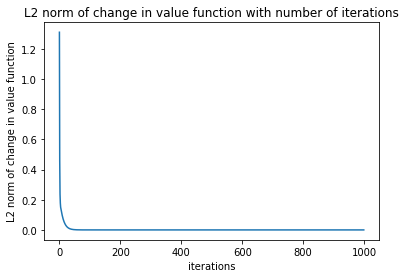

In [55]:
plt.plot(eps)
plt.title("L2 norm of change in value function with number of iterations")
plt.xlabel('iterations')
plt.ylabel("L2 norm of change in value function")

In [56]:
import seaborn
import matplotlib.pyplot as plt
import numpy as np
def fancy_visual(value_func,policy_int):    
    grid = 4
    f, ax = plt.subplots(figsize=(11, 9))
    cmap = seaborn.diverging_palette(220, 10, as_cmap=True)
    reshaped=np.reshape(value_func,(grid,grid))
    seaborn.heatmap(reshaped, cmap=cmap, vmax=1.1,
                square=True, xticklabels=grid+1, yticklabels=grid+1,
                linewidths=.5, cbar_kws={"shrink": .5}, ax=ax, annot=True, fmt="f")
    counter=0
    for j in range(0, 4):
        for i in range(0, 4):
            if policy_int[counter]==1:
                plt.text(i+0.5, j+0.7, u'\u2193', fontsize=12)
            elif policy_int[counter]==3:
                plt.text(i+0.5, j+0.7, u'\u2191', fontsize=12)
            elif policy_int[counter]==0:
                plt.text(i+0.5, j+0.7, u'\u2190', fontsize=12)
            else:
                plt.text(i+0.5, j+0.7, u'\u2192', fontsize=12)
            counter=counter+1

    plt.title('Heatmap of policy iteration with value function values and directions')
    print('Value Function',value_func)
    print('Policy',policy_int)
    plt.show()

Value Function [6.88909049e-02 6.14145715e-02 7.44097620e-02 5.58073215e-02
 9.18545399e-02 1.06862466e-46 1.12208206e-01 1.31519601e-46
 1.45436355e-01 2.47496955e-01 2.99617593e-01 1.73288407e-46
 1.00530782e-46 3.79935901e-01 6.39020148e-01 1.44580242e-46]
Policy [0 3 0 3 0 3 2 3 3 1 0 3 3 2 1 3]


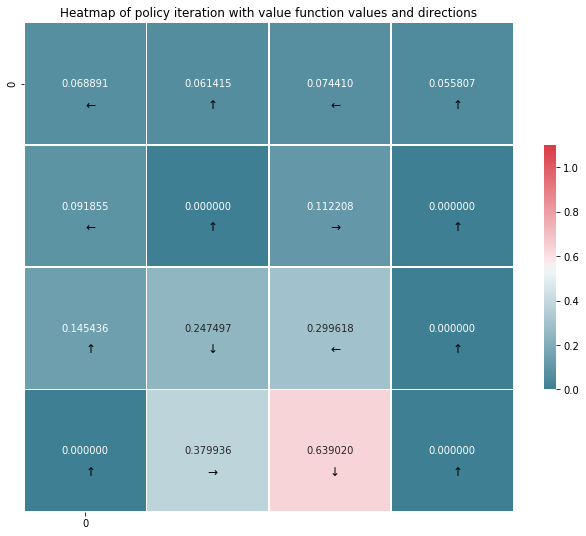

In [57]:
fancy_visual(v_new, pi)